<a href="https://colab.research.google.com/github/sheezarainbow9/Notebooks/blob/main/Projeto_Scraping_Sheeza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OBTENDO DADOS EM JSON NA API SORE SANEAENTO BÁSICO/DOENÇAS ASSOCIADAS:

Importação das bibliotecas Pandas e Numpy.

In [1]:
import requests
import pandas as pd
import numpy as np

In [2]:
url_api = 'https://apisidra.ibge.gov.br/values/t/354/g/2/v/allxp/p/all/c12963/all?formato=json'

In [3]:
resultados = requests.get(url_api, verify = False)
resultados.status_code

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


200

In [4]:
resultados.content

b'[{"NC":"N\xc3\xadvel Territorial (C\xc3\xb3digo)","NN":"N\xc3\xadvel Territorial","MC":"Unidade de Medida (C\xc3\xb3digo)","MN":"Unidade de Medida","V":"Valor","D1C":"Brasil, Grande Regi\xc3\xa3o e UF (C\xc3\xb3digo)","D1N":"Brasil, Grande Regi\xc3\xa3o e UF","D2C":"Vari\xc3\xa1vel (C\xc3\xb3digo)","D2N":"Vari\xc3\xa1vel","D3C":"Ano (C\xc3\xb3digo)","D3N":"Ano","D4C":"Tipo de doen\xc3\xa7a (C\xc3\xb3digo)","D4N":"Tipo de doen\xc3\xa7a"},{"NC":"1","NN":"Brasil","MC":"1020","MN":"Unidades","V":"5564","D1C":"1","D1N":"Brasil","D2C":"2597","D2N":"Munic\xc3\xadpios com ocorr\xc3\xaancia de doen\xc3\xa7as associadas ao saneamento b\xc3\xa1sico","D3C":"2008","D3N":"2008","D4C":"120930","D4N":"Total geral de munic\xc3\xadpios"},{"NC":"1","NN":"Brasil","MC":"1020","MN":"Unidades","V":"2245","D1C":"1","D1N":"Brasil","D2C":"2597","D2N":"Munic\xc3\xadpios com ocorr\xc3\xaancia de doen\xc3\xa7as associadas ao saneamento b\xc3\xa1sico","D3C":"2008","D3N":"2008","D4C":"120931","D4N":"Total"},{"NC":

Guardando os dados numa variável como lista:

In [5]:
resultados_json = resultados.json()
resultados_json

[{'NC': 'Nível Territorial (Código)',
  'NN': 'Nível Territorial',
  'MC': 'Unidade de Medida (Código)',
  'MN': 'Unidade de Medida',
  'V': 'Valor',
  'D1C': 'Brasil, Grande Região e UF (Código)',
  'D1N': 'Brasil, Grande Região e UF',
  'D2C': 'Variável (Código)',
  'D2N': 'Variável',
  'D3C': 'Ano (Código)',
  'D3N': 'Ano',
  'D4C': 'Tipo de doença (Código)',
  'D4N': 'Tipo de doença'},
 {'NC': '1',
  'NN': 'Brasil',
  'MC': '1020',
  'MN': 'Unidades',
  'V': '5564',
  'D1C': '1',
  'D1N': 'Brasil',
  'D2C': '2597',
  'D2N': 'Municípios com ocorrência de doenças associadas ao saneamento básico',
  'D3C': '2008',
  'D3N': '2008',
  'D4C': '120930',
  'D4N': 'Total geral de municípios'},
 {'NC': '1',
  'NN': 'Brasil',
  'MC': '1020',
  'MN': 'Unidades',
  'V': '2245',
  'D1C': '1',
  'D1N': 'Brasil',
  'D2C': '2597',
  'D2N': 'Municípios com ocorrência de doenças associadas ao saneamento básico',
  'D3C': '2008',
  'D3N': '2008',
  'D4C': '120931',
  'D4N': 'Total'},
 {'NC': '1',
  'N

In [6]:
type(resultados_json)

list

In [7]:
len(resultados_json)

496

Chamando o dicionário especificado:

In [8]:
resultados_json[0]

{'NC': 'Nível Territorial (Código)',
 'NN': 'Nível Territorial',
 'MC': 'Unidade de Medida (Código)',
 'MN': 'Unidade de Medida',
 'V': 'Valor',
 'D1C': 'Brasil, Grande Região e UF (Código)',
 'D1N': 'Brasil, Grande Região e UF',
 'D2C': 'Variável (Código)',
 'D2N': 'Variável',
 'D3C': 'Ano (Código)',
 'D3N': 'Ano',
 'D4C': 'Tipo de doença (Código)',
 'D4N': 'Tipo de doença'}

Criando uma nova lista e passando os valores em um dicionário:

In [9]:
lista_novos_dados = []

for item in resultados_json:
  novos_dados = {
      'N_Territorial_Code': item.get('NC'),
      'Nivel_Territorial': item.get('NN'),
      'Unidade_Medida': item.get('MN'),
      'Valor': item.get('V'),
      'Brasil_GR_UF_Code': item.get('D1C'),
      'Brasil_GR_UF': item.get('D1N'),
      'Variavel_Code': item.get('D2C'),
      'Variavel': item.get('D2N'),
      'Ano': item.get('D3N'),
      'Doenca_Code': item.get('D4C'),
      'Doenca': item.get('D4N')
  }

  lista_novos_dados.append(novos_dados)

In [10]:
lista_novos_dados

[{'N_Territorial_Code': 'Nível Territorial (Código)',
  'Nivel_Territorial': 'Nível Territorial',
  'Unidade_Medida': 'Unidade de Medida',
  'Valor': 'Valor',
  'Brasil_GR_UF_Code': 'Brasil, Grande Região e UF (Código)',
  'Brasil_GR_UF': 'Brasil, Grande Região e UF',
  'Variavel_Code': 'Variável (Código)',
  'Variavel': 'Variável',
  'Ano': 'Ano',
  'Doenca_Code': 'Tipo de doença (Código)',
  'Doenca': 'Tipo de doença'},
 {'N_Territorial_Code': '1',
  'Nivel_Territorial': 'Brasil',
  'Unidade_Medida': 'Unidades',
  'Valor': '5564',
  'Brasil_GR_UF_Code': '1',
  'Brasil_GR_UF': 'Brasil',
  'Variavel_Code': '2597',
  'Variavel': 'Municípios com ocorrência de doenças associadas ao saneamento básico',
  'Ano': '2008',
  'Doenca_Code': '120930',
  'Doenca': 'Total geral de municípios'},
 {'N_Territorial_Code': '1',
  'Nivel_Territorial': 'Brasil',
  'Unidade_Medida': 'Unidades',
  'Valor': '2245',
  'Brasil_GR_UF_Code': '1',
  'Brasil_GR_UF': 'Brasil',
  'Variavel_Code': '2597',
  'Variave

Fazer um novo dataframe da nova lista:

In [11]:
resultados_df = pd.DataFrame(lista_novos_dados)
resultados_df

,N_Territorial_Code,Nivel_Territorial,Unidade_Medida,Valor,Brasil_GR_UF_Code,Brasil_GR_UF,Variavel_Code,Variavel,Ano,Doenca_Code,Doenca
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida,Valor,"Brasil, Grande Região e UF (Código)","Brasil, Grande Região e UF",Variável (Código),Variável,Ano,Tipo de doença (Código),Tipo de doença
1,1,Brasil,Unidades,5564,1,Brasil,2597,Municípios com ocorrência de doenças associada...,2008,120930,Total geral de municípios
2,1,Brasil,Unidades,2245,1,Brasil,2597,Municípios com ocorrência de doenças associada...,2008,120931,Total
3,1,Brasil,Unidades,1517,1,Brasil,2597,Municípios com ocorrência de doenças associada...,2008,120932,Diarréia
4,1,Brasil,Unidades,197,1,Brasil,2597,Municípios com ocorrência de doenças associada...,2008,120933,Leptospirose
...,...,...,...,...,...,...,...,...,...,...,...
491,3,Unidade da Federação,Unidades,-,53,Distrito Federal,2597,Municípios com ocorrência de doenças associada...,2008,120940,Hepatite
492,3,Unidade da Federação,Unidades,-,53,Distrito Federal,2597,Municípios com ocorrência de doenças associada...,2008,120941,Febre amarela
493,3,Unidade da Federação,Unidades,-,53,Distrito Federal,2597,Municípios com ocorrência de doenças associada...,2008,120942,Dermatite
494,3,Unidade da Federação,Unidades,-,53,Distrito Federal,2597,Municípios com ocorrência de doenças associada...,2008,120943,Doença do aparelho respiratório


In [12]:
resultados_df

,N_Territorial_Code,Nivel_Territorial,Unidade_Medida,Valor,Brasil_GR_UF_Code,Brasil_GR_UF,Variavel_Code,Variavel,Ano,Doenca_Code,Doenca
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida,Valor,"Brasil, Grande Região e UF (Código)","Brasil, Grande Região e UF",Variável (Código),Variável,Ano,Tipo de doença (Código),Tipo de doença
1,1,Brasil,Unidades,5564,1,Brasil,2597,Municípios com ocorrência de doenças associada...,2008,120930,Total geral de municípios
2,1,Brasil,Unidades,2245,1,Brasil,2597,Municípios com ocorrência de doenças associada...,2008,120931,Total
3,1,Brasil,Unidades,1517,1,Brasil,2597,Municípios com ocorrência de doenças associada...,2008,120932,Diarréia
4,1,Brasil,Unidades,197,1,Brasil,2597,Municípios com ocorrência de doenças associada...,2008,120933,Leptospirose
...,...,...,...,...,...,...,...,...,...,...,...
491,3,Unidade da Federação,Unidades,-,53,Distrito Federal,2597,Municípios com ocorrência de doenças associada...,2008,120940,Hepatite
492,3,Unidade da Federação,Unidades,-,53,Distrito Federal,2597,Municípios com ocorrência de doenças associada...,2008,120941,Febre amarela
493,3,Unidade da Federação,Unidades,-,53,Distrito Federal,2597,Municípios com ocorrência de doenças associada...,2008,120942,Dermatite
494,3,Unidade da Federação,Unidades,-,53,Distrito Federal,2597,Municípios com ocorrência de doenças associada...,2008,120943,Doença do aparelho respiratório


In [13]:
resultados_df.sort_values(['Valor', 'Doenca'], ascending = False)[['Brasil_GR_UF', 'Valor', 'Doenca']]
resultados_df.head()

,N_Territorial_Code,Nivel_Territorial,Unidade_Medida,Valor,Brasil_GR_UF_Code,Brasil_GR_UF,Variavel_Code,Variavel,Ano,Doenca_Code,Doenca
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida,Valor,"Brasil, Grande Região e UF (Código)","Brasil, Grande Região e UF",Variável (Código),Variável,Ano,Tipo de doença (Código),Tipo de doença
1,1,Brasil,Unidades,5564,1,Brasil,2597,Municípios com ocorrência de doenças associada...,2008,120930,Total geral de municípios
2,1,Brasil,Unidades,2245,1,Brasil,2597,Municípios com ocorrência de doenças associada...,2008,120931,Total
3,1,Brasil,Unidades,1517,1,Brasil,2597,Municípios com ocorrência de doenças associada...,2008,120932,Diarréia
4,1,Brasil,Unidades,197,1,Brasil,2597,Municípios com ocorrência de doenças associada...,2008,120933,Leptospirose


Salvando os dados do dataframe como uma tabela estruturada em csv:

In [14]:
resultados_df.to_csv('doencas_por_regiao.csv', index = False)

Importar o arquivo .csv.

In [15]:
df_saneamento = pd.read_csv('/content/doencas_por_regiao.csv')
df_saneamento

,N_Territorial_Code,Nivel_Territorial,Unidade_Medida,Valor,Brasil_GR_UF_Code,Brasil_GR_UF,Variavel_Code,Variavel,Ano,Doenca_Code,Doenca
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida,Valor,"Brasil, Grande Região e UF (Código)","Brasil, Grande Região e UF",Variável (Código),Variável,Ano,Tipo de doença (Código),Tipo de doença
1,1,Brasil,Unidades,5564,1,Brasil,2597,Municípios com ocorrência de doenças associada...,2008,120930,Total geral de municípios
2,1,Brasil,Unidades,2245,1,Brasil,2597,Municípios com ocorrência de doenças associada...,2008,120931,Total
3,1,Brasil,Unidades,1517,1,Brasil,2597,Municípios com ocorrência de doenças associada...,2008,120932,Diarréia
4,1,Brasil,Unidades,197,1,Brasil,2597,Municípios com ocorrência de doenças associada...,2008,120933,Leptospirose
...,...,...,...,...,...,...,...,...,...,...,...
491,3,Unidade da Federação,Unidades,-,53,Distrito Federal,2597,Municípios com ocorrência de doenças associada...,2008,120940,Hepatite
492,3,Unidade da Federação,Unidades,-,53,Distrito Federal,2597,Municípios com ocorrência de doenças associada...,2008,120941,Febre amarela
493,3,Unidade da Federação,Unidades,-,53,Distrito Federal,2597,Municípios com ocorrência de doenças associada...,2008,120942,Dermatite
494,3,Unidade da Federação,Unidades,-,53,Distrito Federal,2597,Municípios com ocorrência de doenças associada...,2008,120943,Doença do aparelho respiratório


Mostrar as doenças listadas no dataframe.

In [16]:
df_saneamento['Doenca'].unique()

array(['Tipo de doença', 'Total geral de municípios', 'Total', 'Diarréia',
       'Leptospirose', 'Verminoses', 'Cólera', 'Difteria', 'Dengue',
       'Tifo', 'Malária', 'Hepatite', 'Febre amarela', 'Dermatite',
       'Doença do aparelho respiratório', 'Outra'], dtype=object)

Verificando valores NaN.

In [17]:
df_saneamento.isna().sum()

N_Territorial_Code    0
Nivel_Territorial     0
Unidade_Medida        0
Valor                 0
Brasil_GR_UF_Code     0
Brasil_GR_UF          0
Variavel_Code         0
Variavel              0
Ano                   0
Doenca_Code           0
Doenca                0
dtype: int64

Cópia de segurança do dataframe.

In [18]:
df2_saneamento = df_saneamento.copy()

Agrupar por território e doença.

In [19]:
df2_saneamento = df2_saneamento.groupby(['Nivel_Territorial', 'Doenca', 'Brasil_GR_UF', 'Valor']).sum()
df2_saneamento

N_Territorial_Code  \
Nivel_Territorial    Doenca     Brasil_GR_UF   Valor                      
Brasil               Cólera     Brasil         54                     1   
                     Dengue     Brasil         1547                   1   
                     Dermatite  Brasil         452                    1   
                     Diarréia   Brasil         1517                   1   
                     Difteria   Brasil         65                     1   
...                                                                 ...   
Unidade da Federação Verminoses Roraima        3                      3   
                                Santa Catarina 19                     3   
                                Sergipe        21                     3   
                                São Paulo      51                     3   
                                Tocantins      23                     3   

                                                     Unidade_Medida  \
Nivel_Territorial    Doenca     Brasil_GR_UF   Valor                  
Brasil               Cólera     Brasil         54          Unidades   
                     Dengue     Brasil         1547        Unidades   
                     Dermatite  Brasil         452         Unidades   
                     Diarréia   Brasil         1517        Unidades   
                     Difteria   Brasil         65          Unidades   
...                                                             ...   
Unidade da Federação Verminoses Roraima        3           Unidades   
                                Santa Catarina 19          Unidades   
                                Sergipe        21          Unidades   
                                São Paulo      51          Unidades   
                                Tocantins      23          Unidades   

                                                     Brasil_GR_UF_Code  \
Nivel_Territorial    Doenca     Brasil_GR_UF   Valor                     
Brasil               Cólera     Brasil         54                    1   
                     Dengue     Brasil         1547                  1   
                     Dermatite  Brasil         452                   1   
                     Diarréia   Brasil         1517                  1   
                     Difteria   Brasil         65                    1   
...                                                                ...   
Unidade da Federação Verminoses Roraima        3                    14   
                                Santa Catarina 19                   42   
                                Sergipe        21                   28   
                                São Paulo      51                   35   
                                Tocantins      23                   17   

                                                     Variavel_Code  \
Nivel_Territorial    Doenca     Brasil_GR_UF   Valor                 
Brasil               Cólera     Brasil         54             2597   
                     Dengue     Brasil         1547           2597   
                     Dermatite  Brasil         452            2597   
                     Diarréia   Brasil         1517           2597   
                     Difteria   Brasil         65             2597   
...                                                            ...   
Unidade da Federação Verminoses Roraima        3              2597   
                                Santa Catarina 19             2597   
                                Sergipe        21             2597   
                                São Paulo      51             2597   
                                Tocantins      23             2597   

                                                                                               Variavel  \
Nivel_Territorial    Doenca     Brasil_GR_UF   Valor                                                      
Brasil               Cólera     Brasil         54     Municípios 

In [20]:
df2_saneamento = df2_saneamento.drop(columns = ['N_Territorial_Code', 'Unidade_Medida', 'Brasil_GR_UF_Code', 'Variavel_Code', 'Doenca_Code'])
df2_saneamento

Variavel  \
Nivel_Territorial    Doenca     Brasil_GR_UF   Valor                                                      
Brasil               Cólera     Brasil         54     Municípios com ocorrência de doenças associada...   
                     Dengue     Brasil         1547   Municípios com ocorrência de doenças associada...   
                     Dermatite  Brasil         452    Municípios com ocorrência de doenças associada...   
                     Diarréia   Brasil         1517   Municípios com ocorrência de doenças associada...   
                     Difteria   Brasil         65     Municípios com ocorrência de doenças associada...   
...                                                                                                 ...   
Unidade da Federação Verminoses Roraima        3      Municípios com ocorrência de doenças associada...   
                                Santa Catarina 19     Municípios com ocorrência de doenças associada...   
                                Sergipe        21     Municípios com ocorrência de doenças associada...   
                                São Paulo      51     Municípios com ocorrência de doenças associada...   
                                Tocantins      23     Municípios com ocorrência de doenças associada...   

                                                       Ano  
Nivel_Territorial    Doenca     Brasil_GR_UF   Valor        
Brasil               Cólera     Brasil         54     2008  
                     Dengue     Brasil         1547   2008  
                     Dermatite  Brasil         452    2008  
                     Diarréia   Brasil         1517   2008  
                     Difteria   Brasil         65     2008  
...                                                    ...  
Unidade da Federação Verminoses Roraima        3      2008  
                                Santa Catarina 19     2008  
                                Sergipe        21     2008  
                                São Paulo      51     2008  
                                Tocantins      23     2008  

[496 rows x 2 columns]

Dei um reset no index.

In [132]:
df2_saneamento = df2_saneamento.groupby(['Brasil_GR_UF','Doenca','Valor']).sum().reset_index()

Agrupar por doenças causadas por mosquitos (dengue, malária, febre amarela).

In [133]:
dengue = df2_saneamento[df2_saneamento['Doenca'].str.contains('Dengue')]
dengue.head()

,Brasil_GR_UF,Doenca,Valor,Variavel,Ano
1,Acre,Dengue,6,Municípios com ocorrência de doenças associada...,2008
16,Alagoas,Dengue,51,Municípios com ocorrência de doenças associada...,2008
31,Amapá,Dengue,3,Municípios com ocorrência de doenças associada...,2008
46,Amazonas,Dengue,12,Municípios com ocorrência de doenças associada...,2008
61,Bahia,Dengue,208,Municípios com ocorrência de doenças associada...,2008


In [134]:
febre_amarela = df2_saneamento[df2_saneamento['Doenca'].str.contains('Febre amarela')]
febre_amarela.head()

,Brasil_GR_UF,Doenca,Valor,Variavel,Ano
6,Acre,Febre amarela,-,Municípios com ocorrência de doenças associada...,2008
21,Alagoas,Febre amarela,-,Municípios com ocorrência de doenças associada...,2008
36,Amapá,Febre amarela,-,Municípios com ocorrência de doenças associada...,2008
51,Amazonas,Febre amarela,4,Municípios com ocorrência de doenças associada...,2008
66,Bahia,Febre amarela,3,Municípios com ocorrência de doenças associada...,2008


In [135]:
dengue = df2_saneamento[df2_saneamento['Doenca'].str.contains('Dengue')]
dengue.head()

,Brasil_GR_UF,Doenca,Valor,Variavel,Ano
1,Acre,Dengue,6,Municípios com ocorrência de doenças associada...,2008
16,Alagoas,Dengue,51,Municípios com ocorrência de doenças associada...,2008
31,Amapá,Dengue,3,Municípios com ocorrência de doenças associada...,2008
46,Amazonas,Dengue,12,Municípios com ocorrência de doenças associada...,2008
61,Bahia,Dengue,208,Municípios com ocorrência de doenças associada...,2008


In [136]:
malaria = df2_saneamento[df2_saneamento['Doenca'].str.contains('Malária')]
malaria.head()

,Brasil_GR_UF,Doenca,Valor,Variavel,Ano
9,Acre,Malária,10,Municípios com ocorrência de doenças associada...,2008
24,Alagoas,Malária,-,Municípios com ocorrência de doenças associada...,2008
39,Amapá,Malária,12,Municípios com ocorrência de doenças associada...,2008
54,Amazonas,Malária,28,Municípios com ocorrência de doenças associada...,2008
69,Bahia,Malária,2,Municípios com ocorrência de doenças associada...,2008


Jogo os dados numa variável data.

In [137]:
data = malaria, dengue, febre_amarela

In [138]:
doencas_mosquitos = pd.concat(data)
doencas_mosquitos.head(100)

,Brasil_GR_UF,Doenca,Valor,Variavel,Ano
9,Acre,Malária,10,Municípios com ocorrência de doenças associada...,2008
24,Alagoas,Malária,-,Municípios com ocorrência de doenças associada...,2008
39,Amapá,Malária,12,Municípios com ocorrência de doenças associada...,2008
54,Amazonas,Malária,28,Municípios com ocorrência de doenças associada...,2008
69,Bahia,Malária,2,Municípios com ocorrência de doenças associada...,2008
...,...,...,...,...,...
427,Sergipe,Febre amarela,-,Municípios com ocorrência de doenças associada...,2008
442,Sudeste,Febre amarela,17,Municípios com ocorrência de doenças associada...,2008
457,Sul,Febre amarela,1,Municípios com ocorrência de doenças associada...,2008
472,São Paulo,Febre amarela,2,Municípios com ocorrência de doenças associada...,2008


In [139]:
norte1 = df2_saneamento[df2_saneamento['Brasil_GR_UF'].str.contains('Rondônia')]
norte2 = df2_saneamento[df2_saneamento['Brasil_GR_UF'].str.contains('Acre')]
norte3 = df2_saneamento[df2_saneamento['Brasil_GR_UF'].str.contains('Pará')]
norte4 = df2_saneamento[df2_saneamento['Brasil_GR_UF'].str.contains('Tocantins')]
norte5 = df2_saneamento[df2_saneamento['Brasil_GR_UF'].str.contains('Amapá')]
norte6 = df2_saneamento[df2_saneamento['Brasil_GR_UF'].str.contains('Maranhão')]
norte7 = df2_saneamento[df2_saneamento['Brasil_GR_UF'].str.contains('Roraima')]




data_norte = [norte1, norte2, norte3, norte4, norte5, norte6, norte7]

df_norte = pd.concat(data_norte)

df_norte.tail(100)

,Brasil_GR_UF,Doenca,Valor,Variavel,Ano
381,Rondônia,Doença do aparelho respiratório,5,Municípios com ocorrência de doenças associada...,2008
382,Rondônia,Febre amarela,1,Municípios com ocorrência de doenças associada...,2008
383,Rondônia,Hepatite,3,Municípios com ocorrência de doenças associada...,2008
384,Rondônia,Leptospirose,-,Municípios com ocorrência de doenças associada...,2008
385,Rondônia,Malária,8,Municípios com ocorrência de doenças associada...,2008
...,...,...,...,...,...
401,Roraima,Outra,-,Municípios com ocorrência de doenças associada...,2008
402,Roraima,Tifo,-,Municípios com ocorrência de doenças associada...,2008
403,Roraima,Total,9,Municípios com ocorrência de doenças associada...,2008
404,Roraima,Total geral de municípios,15,Municípios com ocorrência de doenças associada...,2008


In [140]:
df_norte_doenca = doencas_mosquitos.merge(df_norte, how = 'inner')

In [141]:
df_norte_doenca

,Brasil_GR_UF,Doenca,Valor,Variavel,Ano
0,Acre,Malária,10,Municípios com ocorrência de doenças associada...,2008
1,Amapá,Malária,12,Municípios com ocorrência de doenças associada...,2008
2,Maranhão,Malária,25,Municípios com ocorrência de doenças associada...,2008
3,Pará,Malária,50,Municípios com ocorrência de doenças associada...,2008
4,Rondônia,Malária,8,Municípios com ocorrência de doenças associada...,2008
5,Roraima,Malária,6,Municípios com ocorrência de doenças associada...,2008
6,Tocantins,Malária,-,Municípios com ocorrência de doenças associada...,2008
7,Acre,Dengue,6,Municípios com ocorrência de doenças associada...,2008
8,Amapá,Dengue,3,Municípios com ocorrência de doenças associada...,2008
9,Maranhão,Dengue,85,Municípios com ocorrência de doenças associada...,2008


Importando lib para plotagem de gráficos.

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns


Gráfico da quantidade de doenças causadas por mosquito na Região Norte.

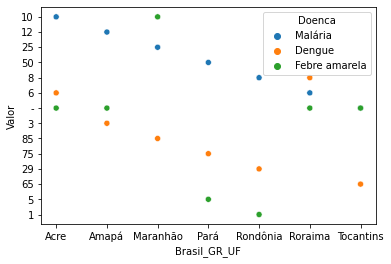

In [143]:
sns.scatterplot(data = df_norte_doenca, x = "Brasil_GR_UF", y = "Valor", hue = 'Doenca')